In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ridge_map import RidgeMap

from palettable.cartocolors.sequential import Mint_6_r

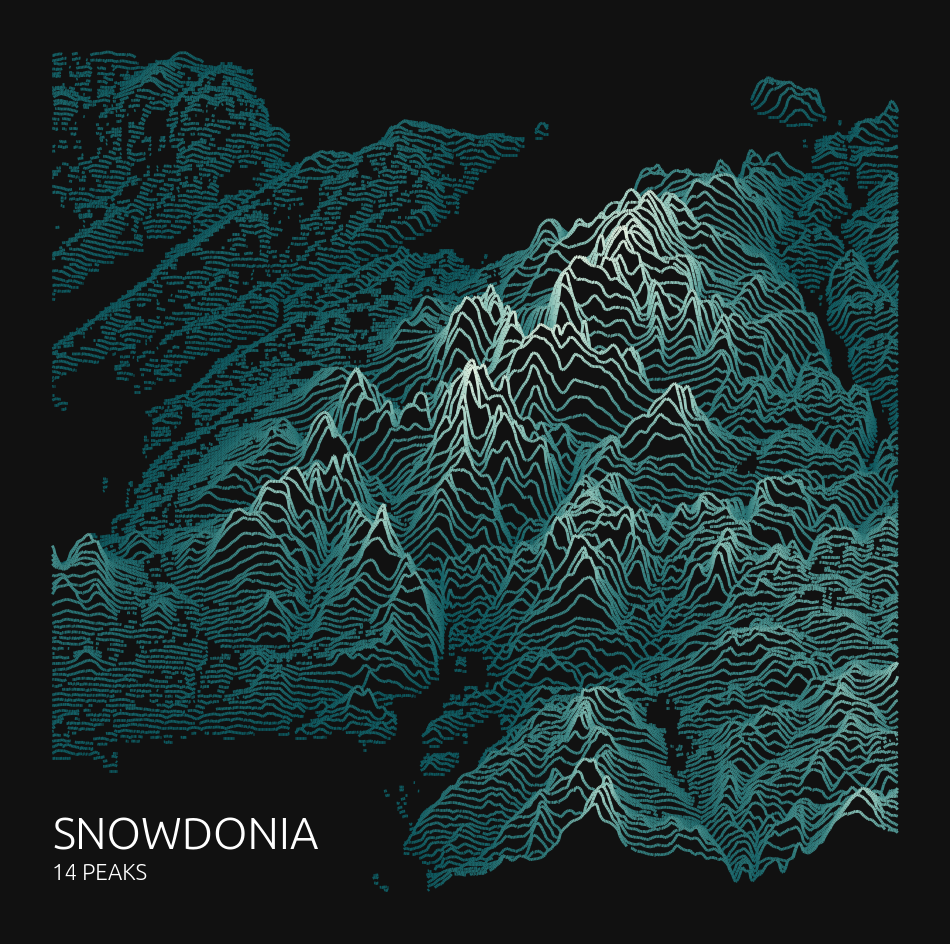

In [3]:
# map boundaries
tr = [53.36537517945336, -3.7756046038446267][::-1]
bl = [52.809169021491634, -4.371948916242599][::-1]

#colours
bgcolor = "#111111"
cmap = Mint_6_r.mpl_colormap

#Setup figure
fig,ax = plt.subplots(figsize=(12, 12))
fig.set_facecolor(bgcolor)

#========
#plot elevation lines
rm = RidgeMap(bl + tr, font = "Ubuntu")
values = rm.get_elevation_data(num_lines=200, elevation_pts=600)
ridges = rm.plot_map(values=rm.preprocess(values=values, vertical_ratio=200, water_ntile=0, 
                                 lake_flatness=3), 
            kind='elevation',
            label=None,
            line_color = plt.get_cmap(cmap),
            background_color = bgcolor,
            ax=ax
           )

#plot peaks --> decided not to ruin the miniam
#for i in range(len(peaks)):
#    #peak coords
#    coords = ((peaks["lon"][i] - rm.longs[0])/(rm.longs[1] - rm.longs[0]),
#              (peaks["lat"][i] - rm.lats[0])/(rm.lats[1] - rm.lats[0]))
#    ridges.plot(*coords, 'o',
#            color='white',
#            transform=ridges.transAxes,
#            ms=6,
#            zorder=5000)
# 

#========
#title
plt.figtext(0.16,0.21, "Snowdonia".upper(), va='top', ha="left", fontsize=32, color="white", fontname="Ubuntu", 
            weight='ultralight')
plt.figtext(0.16,0.17, "14 peaks".upper(), va='top', ha="left", fontsize=16, color="white", fontname="Ubuntu",
           weight='ultralight')

#save
plt.savefig("snowdonia-14peaks.png", bbox_inches='tight',  transparent=False, pad_inches=0)

plt.show()

In [81]:
peaks = {"name" : ["Carnedd Dafydd", "Carnedd Llewelyn", "Castell y Gwynt", "Crib Goch", "Crib y Ddysgl",
                   "Elidir Fawr", "Foel Grach", "Foel-fras", "Garnedd Uchaf", "Glyder Fach", 
                   "Glyder Fawr", "Pen yr Ole Wen", "Snowdon-Yr Wyddfa", "Tryfan", "Y Garn", "Yr Elen"] ,   
        "lat": [53.147710, 53.160132, 53.103791, 53.076117,53.075536, 53.130771, 53.174022, 53.194111 , 
                 53.182952, 53.104796, 53.101441, 53.137637, 53.068469, 53.114869, 53.115654, 53.166573],
         "lon": [-4.000897, -3.970361, -4.012079, -4.055203, -4.075226, -4.075974, -3.963291, -3.953221,
                -3.966408, -4.008451, -4.029208, -4.010700, -4.076274, -3.997534, -4.047122, -3.985273]
        }
peaks = pd.DataFrame.from_dict(peaks)
peaks

,name,lat,lon
0,Carnedd Dafydd,53.147710,-4.000897
1,Carnedd Llewelyn,53.160132,-3.970361
2,Castell y Gwynt,53.103791,-4.012079
3,Crib Goch,53.076117,-4.055203
4,Crib y Ddysgl,53.075536,-4.075226
5,Elidir Fawr,53.130771,-4.075974
6,Foel Grach,53.174022,-3.963291
7,Foel-fras,53.194111,-3.953221
8,Garnedd Uchaf,53.182952,-3.966408
9,Glyder Fach,53.104796,-4.008451


## Example

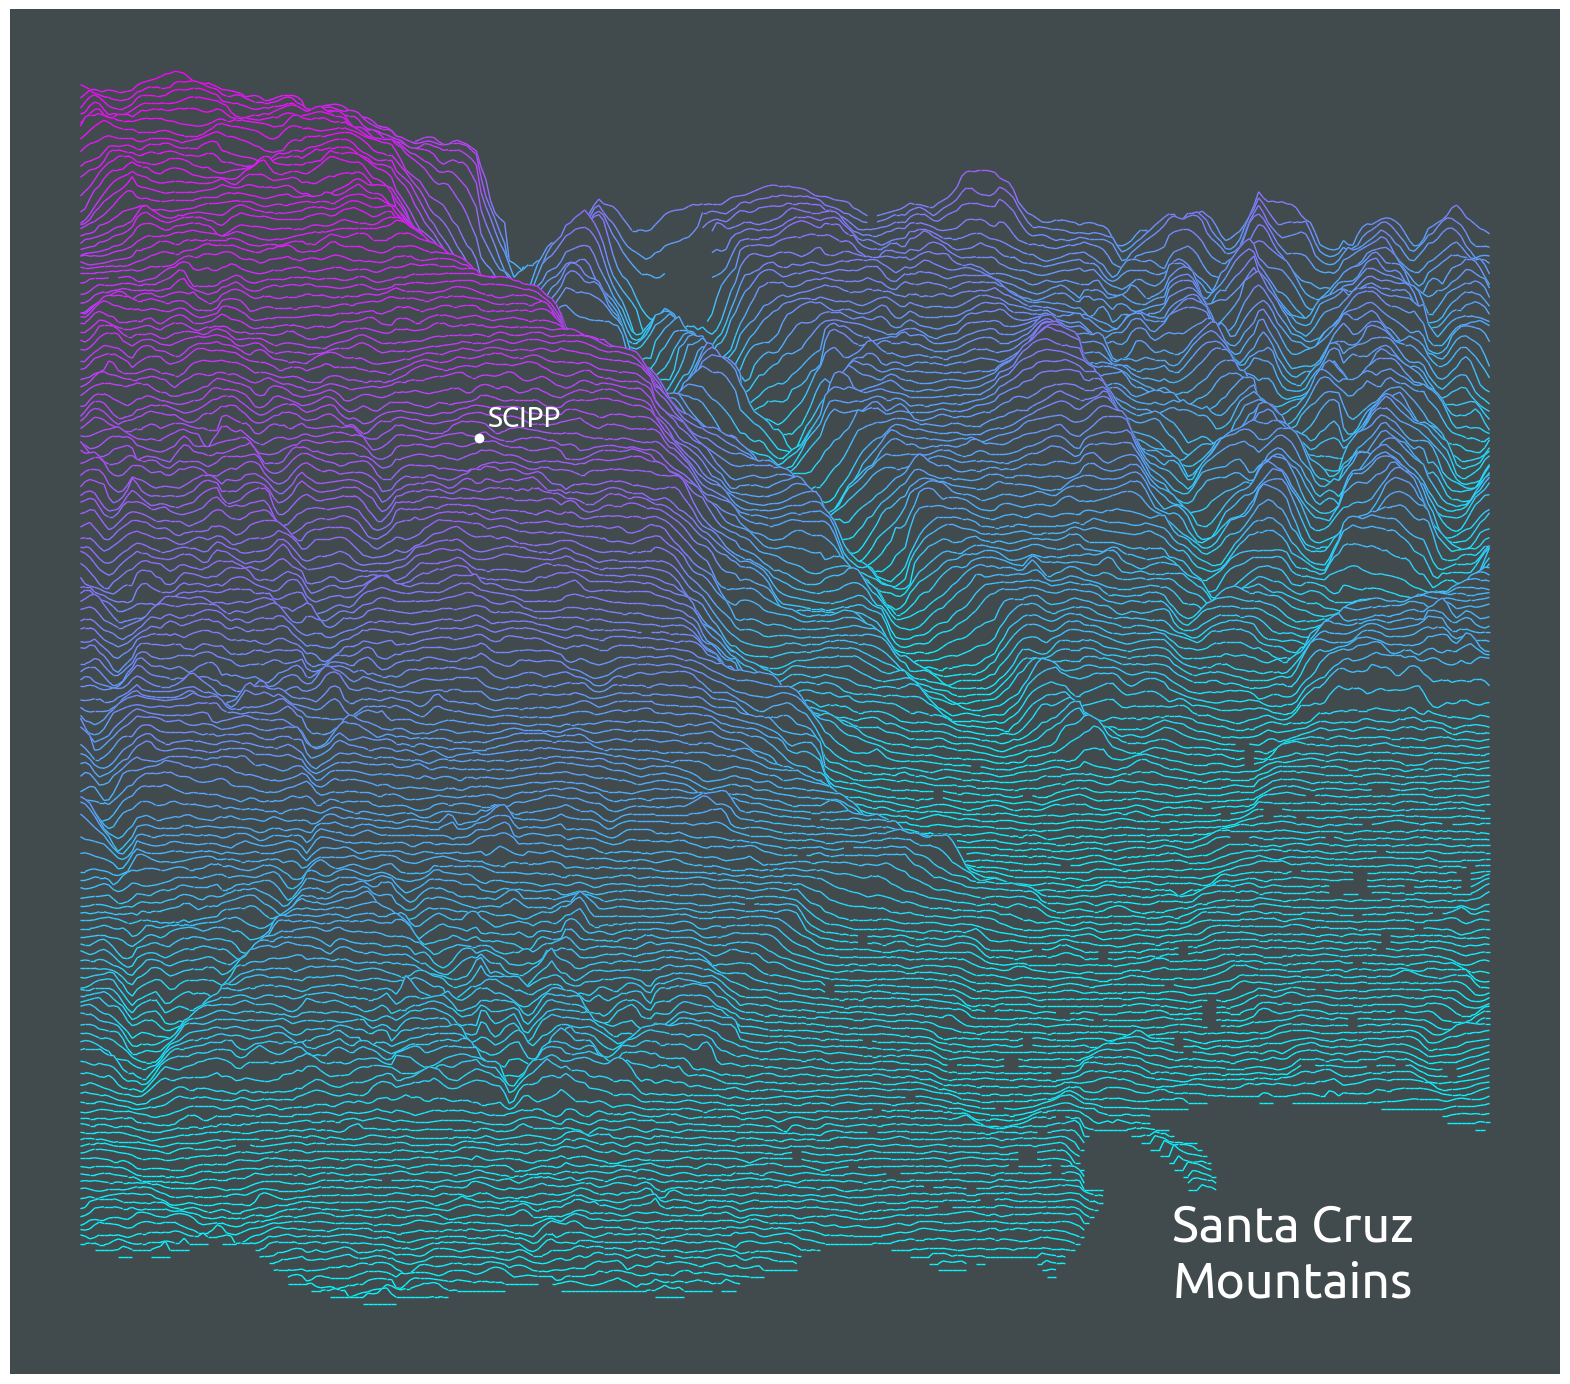

In [158]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

bgcolor = np.array([65,74,76])/255.

scipp = (-122.060510, 36.998776)
rm = RidgeMap((-122.087116,36.945365,-121.999226,37.023250), font="Ubuntu")
scipp_coords = ((scipp[0] - rm.longs[0])/(rm.longs[1] - rm.longs[0]),(scipp[1] - rm.lats[0])/(rm.lats[1] - rm.lats[0]))

values = rm.get_elevation_data(num_lines=150)
ridges = rm.plot_map(values=rm.preprocess(values=values,
                                          lake_flatness=1,
                                          water_ntile=0,
                                          vertical_ratio=240),
            label='Santa Cruz\nMountains',
            label_x=0.75,
            label_y=0.05,
            label_size=36,
            kind='elevation',
            linewidth=1,
            background_color=bgcolor,
            line_color = plt.get_cmap('cool'))

# Bit of a hack to update the text label color
for child in ridges.get_children():
    if isinstance(child, matplotlib.text.Text) and 'Santa Cruz' in child._text:
        label_artist = child
        break
label_artist.set_color('white')

ridges.text(scipp_coords[0]+0.005, scipp_coords[1]+0.005, 'SCIPP',
            fontproperties=rm.font,
            size=20,
            color="white",
            transform=ridges.transAxes,
            verticalalignment="bottom",
            zorder=len(values)+10)

ridges.plot(*scipp_coords, 'o',
            color='white',
            transform=ridges.transAxes,
            ms=6,
            zorder=len(values)+10)